## Data Import and Cleaning

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns

# Study data file
ILI_results_path = "FluViewPhase2Data/ILINet.csv"

# Read the flu data and skip header row
ILI_df = pd.read_csv(ILI_results_path, skiprows=1)

#Return row types
ILI_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27098 entries, 0 to 27097
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   REGION TYPE        27098 non-null  object
 1   REGION             27098 non-null  object
 2   YEAR               27098 non-null  int64 
 3   WEEK               27098 non-null  int64 
 4   % WEIGHTED ILI     27098 non-null  object
 5   %UNWEIGHTED ILI    27098 non-null  object
 6   AGE 0-4            27098 non-null  object
 7   AGE 25-49          27098 non-null  object
 8   AGE 25-64          27098 non-null  object
 9   AGE 5-24           27098 non-null  object
 10  AGE 50-64          27098 non-null  object
 11  AGE 65             27098 non-null  object
 12  ILITOTAL           27098 non-null  object
 13  NUM. OF PROVIDERS  27098 non-null  object
 14  TOTAL PATIENTS     27098 non-null  object
dtypes: int64(2), object(13)
memory usage: 3.1+ MB


In [2]:
#When trying to convert columns to type float - returned that string "X" values present
#Change any X values to zero
ILI_df_clean = ILI_df.replace('X',0)

#Convert result columns to numbers
ILI_df_clean['ILITOTAL'] = pd.to_numeric(ILI_df_clean['ILITOTAL'])
ILI_df_clean['NUM. OF PROVIDERS'] = pd.to_numeric(ILI_df_clean['NUM. OF PROVIDERS'])
ILI_df_clean['TOTAL PATIENTS'] = pd.to_numeric(ILI_df_clean['TOTAL PATIENTS'])

#Ensure datatype is converted
ILI_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27098 entries, 0 to 27097
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   REGION TYPE        27098 non-null  object
 1   REGION             27098 non-null  object
 2   YEAR               27098 non-null  int64 
 3   WEEK               27098 non-null  int64 
 4   % WEIGHTED ILI     27098 non-null  object
 5   %UNWEIGHTED ILI    27098 non-null  object
 6   AGE 0-4            27098 non-null  int64 
 7   AGE 25-49          27098 non-null  int64 
 8   AGE 25-64          27098 non-null  int64 
 9   AGE 5-24           27098 non-null  int64 
 10  AGE 50-64          27098 non-null  int64 
 11  AGE 65             27098 non-null  int64 
 12  ILITOTAL           27098 non-null  int64 
 13  NUM. OF PROVIDERS  27098 non-null  int64 
 14  TOTAL PATIENTS     27098 non-null  int64 
dtypes: int64(11), object(4)
memory usage: 3.1+ MB


In [3]:
#Filter to desired states that we have weather data for
filtered_df = ILI_df_clean.loc[(ILI_df_clean['REGION']=='New York')|(ILI_df_clean['REGION']=='Illinois')|
                               (ILI_df_clean['REGION']=='Texas')|(ILI_df_clean['REGION']=='Arizona')|
                               (ILI_df_clean['REGION']=='Georgia')|(ILI_df_clean['REGION']=='Pennsylvania')|
                               (ILI_df_clean['REGION']=='California')|(ILI_df_clean['REGION']=='Washington')|
                               (ILI_df_clean['REGION']=='Colorado')]

#Re-name columns to match weather dataset; Give ILITOTAL more meaning
renamed_df = filtered_df.rename(columns = {'REGION': 'State', 'YEAR':'year', 'WEEK':'week',
                                           'ILITOTAL':'Total Reported Flu Cases per Week'})

#Return count of filtered data
renamed_df.count()

REGION TYPE                          4545
State                                4545
year                                 4545
week                                 4545
% WEIGHTED ILI                       4545
%UNWEIGHTED ILI                      4545
AGE 0-4                              4545
AGE 25-49                            4545
AGE 25-64                            4545
AGE 5-24                             4545
AGE 50-64                            4545
AGE 65                               4545
Total Reported Flu Cases per Week    4545
NUM. OF PROVIDERS                    4545
TOTAL PATIENTS                       4545
dtype: int64

In [4]:
#Return only desired columns and export to CSV
final_df = renamed_df[['State', 'year', 'week', 'Total Reported Flu Cases per Week']]
final_df.to_csv('Data/ILI Totals for Desired States.csv', index=False)

## Summary Statistics

In [5]:
# Generate a summary statistics table for totals of all states by year
year_group = final_df.groupby(['year'])
year_statistics = year_group.agg({'Total Reported Flu Cases per Week':['sum','mean', 'median','var', 'std', 'sem']})
year_statistics

Total Reported Flu Cases per Week                                    \
                                   sum         mean median           var   
year                                                                       
2010                             66137   565.273504  349.0  2.940803e+05   
2011                            215663   460.818376  292.0  3.218746e+05   
2012                            201389   430.318376  234.5  2.171306e+05   
2013                            227688   486.512821  295.0  3.504292e+05   
2014                            230702   483.651992  268.0  3.350053e+05   
2015                            209047   446.681624  286.0  2.472764e+05   
2016                            211735   452.425214  299.0  2.256495e+05   
2017                            285099   609.185897  401.0  4.701834e+05   
2018                            404899   865.168803  529.0  1.367337e+06   
2019                            499665  1067.660256  731.5  1.203154e+06   
2020                            366151  1768.845411  996.0  3.046074e+06   

                               
              std         sem  
year                           
2010   542.291715   50.134887  
2011   567.339928   26.225297  
2012   465.972722   21.539597  
2013   591.970576   27.363850  
2014   578.796430   26.501268  
2015   497.268990   22.986267  
2016   475.025811   21.958076  
2017   685.699229   31.696458  
2018  1169.331738   54.052379  
2019  1096.883648   50.703465  
2020  1745.300524  121.306772

In [6]:
# Generate a summary statistics table for each state by year
state_group = final_df.groupby(['State', 'year'])
state_statistics = state_group.agg({'Total Reported Flu Cases per Week':['sum','mean', 'median','var', 'std', 'sem']})
state_statistics

Total Reported Flu Cases per Week                     \
                                              sum        mean median   
State      year                                                        
Arizona    2010                              4088  314.461538  284.0   
           2011                             12705  244.326923  186.5   
           2012                             10362  199.269231  186.0   
           2013                             14226  273.576923  187.0   
           2014                             17608  332.226415  289.0   
...                                           ...         ...    ...   
Washington 2016                              1683   32.365385   20.5   
           2017                              1866   35.884615   16.5   
           2018                              3478   66.884615   28.0   
           2019                             10845  208.557692   68.5   
           2020                             14402  626.173913  807.0   

                                                        
                           var         std         sem  
State      year                                         
Arizona    2010   12924.269231  113.684956   31.530534  
           2011   38672.381222  196.652946   27.270857  
           2012    9703.024133   98.503930   13.660037  
           2013   56110.915535  236.877427   32.848989  
           2014   38795.755443  196.966382   27.055413  
...                        ...         ...         ...  
Washington 2016    1032.236425   32.128436    4.455412  
           2017    2279.751131   47.746739    6.621281  
           2018    8220.260935   90.665655   12.573064  
           2019  151090.604449  388.703749   53.903511  
           2020  231670.150198  481.321255  100.362419  

[99 rows x 6 columns]

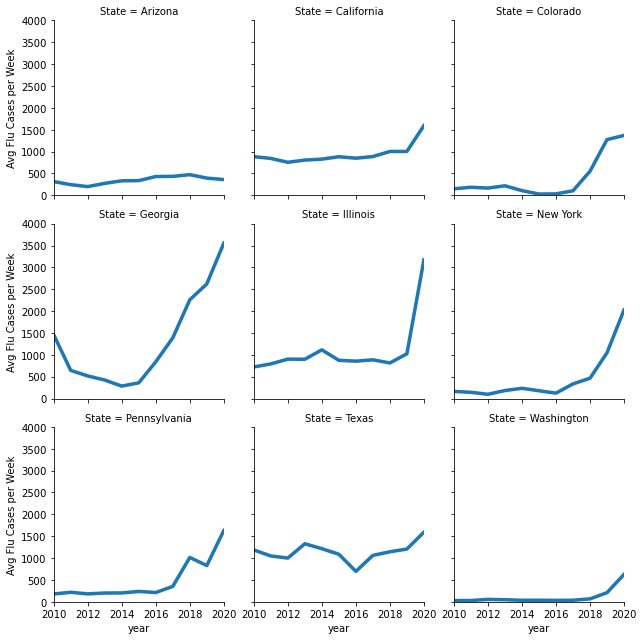

In [7]:
#Generate a grid plot of the average number of cases a week per state by year
myfig = sns.relplot(x="year", y="Total Reported Flu Cases per Week", kind="line", col="State", 
            data=final_df, ci=None, linewidth=3.5, col_wrap=3, height=3, aspect=1)
myfig.set(xlim=(2010,2020), ylim=(0,4000), ylabel='Avg Flu Cases per Week')
myfig.savefig(f'Plots/Avg Flu Cases per week for 2010-2020 for All States.png')